# Progeto de Ciencia de Dados

# Passo a Passo de Um Progeto de Ciencia de Dados

Passo 1: Entendimento do desafio

Passo 2: Entendimento da Area\Empresa

Passo 3: Extração/Obtenção de dados

Passo 4: Ajuste de dados (Tratamento/Limpeza)

Passo 5: Analize Exploratória

Passo 6: Modelagem + Algoritmos(Aqui que entra a inteligencia Artificial, se necessario)

Passo 7: Interpretação de Resultado

# Projeto Ciência de Dados - Previsão de Vendas

Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
TV, Jornal e Rádio estão em milhares de reais
Vendas estão em milhões

# Importar a base de dados

In [5]:
#Importar a base de dados
import pandas as pd

tabela = pd.read_csv(r"C:\Users\pedro\Documents\Jupyter\Jupyter Aula 4\Arquivos\advertising.csv")

display(tabela)
print(tabela.info())


,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


# Analize Exploratória

-> Vamos tentar visualizar a como as informações de cada  item estão distribuidos

-> Vamos ver correlação entre cada um dos itens

In [ ]:
# tem que instalar
# - plotly
# - matplotlib
# - seaborn
#!pip install matplotlib
#!pip install seaborn
#pip install scikit-learn

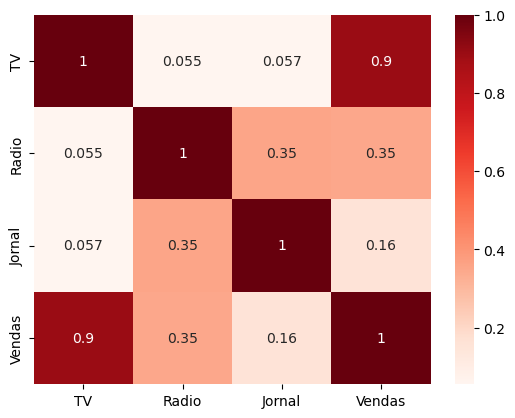

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# criar um grafico
sns.heatmap(tabela.corr(), cmap="Reds", annot=True)
# exibir o grafico
plt.show()


# Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

Separando em dados de treino e dados de teste

In [9]:
y = tabela["Vendas"]
x = tabela[["TV", "Radio", "Jornal"]]

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)
#x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)quize treina.
#random_state=1 fazer aleatorio

# Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

->Regressão Linear

->RandomForest(Árvore de Decisão)

In [10]:
#Importar a inteligencia artificial
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#criar a inteligencia artificial
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

#Treinar a inteligencia artificial
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

# Teste da AI e Avaliação do Melhor Modelo

-> Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece


In [12]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))

0.9130975721296772
0.9659817354808773


# Visualização Gráfica das Previsões

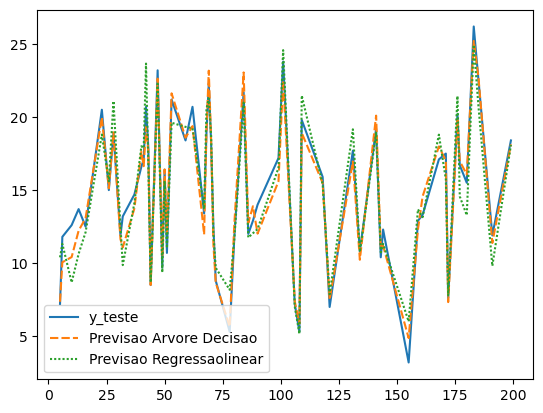

In [14]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsao Arvore Decisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsao Regressaolinear"] = previsao_regressaolinear
sns.lineplot(data=tabela_auxiliar)
plt.show()


# Como fazer uma nova previsão?

In [15]:
nova_tabela = pd.read_csv(r"C:\Users\pedro\Documents\Jupyter\Jupyter Aula 4\Arquivos\novos.csv")
display(nova_tabela)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [16]:
previsao = modelo_arvoredecisao.predict(nova_tabela)
print(previsao)

[ 7.59   8.485 20.379]
